In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8288158017766308065
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4615716425113286700
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

### MobileNet Architecture

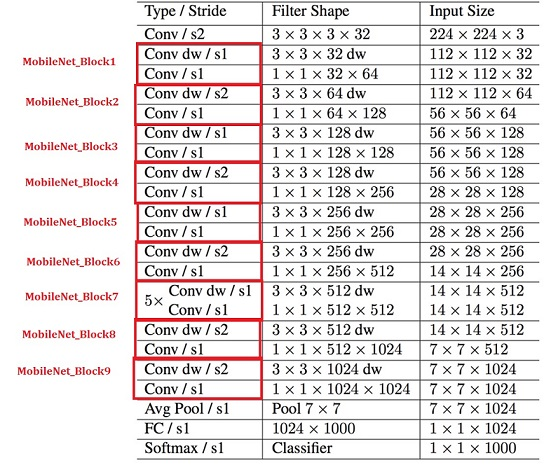

In [30]:
from tensorflow.keras.layers import  Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import DepthwiseConv2D,BatchNormalization,ReLU,Conv2D,GlobalAvgPool2D,Dense

### MobileNet Block

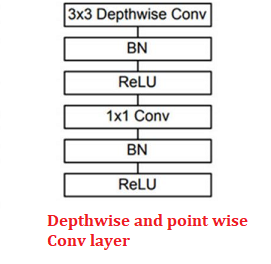

In [31]:
def mobilenet_block(x, f, s=1):
    
  # Depthwise Conv layer
  x = DepthwiseConv2D(3, strides=s, padding='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  # Pointwise Conv layer
  x = Conv2D(f, 1, strides=1, padding='same')(x)
  x = BatchNormalization()(x)
  x = ReLU()(x)
  return x

def mobilenet(input_shape, n_classes):
  
  #stem of the model
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  # The main part of the Model
  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)

  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)

  x = GlobalAvgPool2D()(x)

  output = Dense(n_classes, activation='softmax')(x)

  model = Model(input, output)
  return model

In [34]:
model = mobilenet((224,224,3),3)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_108 (Ba  (None, 112, 112, 32)     128       
 tchNormalization)                                               
                                                                 
 re_lu_108 (ReLU)            (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_52 (Depthw  (None, 112, 112, 32)     320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_109 (Ba  (None, 112, 112, 32)     128 

In [14]:
% cd /content/drive/MyDrive/ComputerVision/dataset/ImgClassification

/content/drive/MyDrive/ComputerVision/dataset/ImgClassification


In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset')

room_types = os.listdir('/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))

['bed_room', 'dining_room', 'living_room']
Types of rooms found:  3


In [16]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('rooms_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('rooms_dataset' + '/' +item) + '/' + room))
    print(rooms)

[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1846251__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1846251__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1303451__340.jpg')]
[('bed_room', 'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'), ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'), ('bed_room', 'rooms_dataset/bed_room/b

In [17]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())

  room type                                              image
0  bed_room  rooms_dataset/bed_room/architecture-modern-hou...
1  bed_room        rooms_dataset/bed_room/bed-1048194__340.jpg
2  bed_room        rooms_dataset/bed_room/bed-1846251__340.jpg
3  bed_room        rooms_dataset/bed_room/bed-1303451__340.jpg
4  bed_room    rooms_dataset/bed_room/bed-4540208__340 (1).jpg


In [18]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

Total number of rooms in the dataset:  37
rooms in each category: 
living_room    14
bed_room       12
dining_room    11
Name: room type, dtype: int64


In [19]:
import cv2
path = '/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset/'

im_size = 224

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [20]:
images[0].shape

(224, 224, 3)

In [21]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(37, 224, 224, 3)

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
y=y.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder

# binary encode
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
Y = onehot_encoder.fit_transform(y)

In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(35, 224, 224, 3)
(35, 3)
(2, 224, 224, 3)
(2, 3)


In [35]:
model.fit(train_x, train_y, epochs = 3, batch_size = 32)

Epoch 1/3
2/2 [==============================] - 35s 628ms/step - loss: 1.1370 - accuracy: 0.3429
Epoch 2/3
2/2 [==============================] - 0s 50ms/step - loss: 1.0318 - accuracy: 0.5429
Epoch 3/3
2/2 [==============================] - 0s 57ms/step - loss: 1.3251 - accuracy: 0.3714


Input image shape: (1, 224, 224, 3)


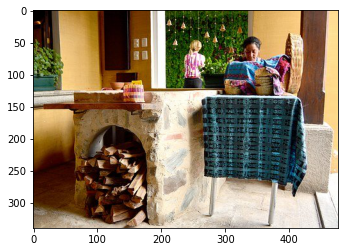

In [36]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/drive/MyDrive/ComputerVision/dataset/ImgClassification/rooms_dataset/dining_room/dining-room-1420457__340.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [37]:
print(model.predict(x))

[[0.32810152 0.3335507  0.33834776]]
